# Methane Emissions Throughout the World

**Jade Supino**

------

Dataset obtained from the World Bank Catalog EnergyData.Info.

https://energydata.info/dataset/methane-tracker-database

Click on Source in the additional table and it takes you to https://www.iea.org/data-and-statistics/data-tools/methane-tracker-data-explorer

Source is the International Energy Agency (IEA)

Dataset contains <font color='red'>**1,548 items**</font> and <font color='red'>**9 attributes**</font>.
The emissions are in kiloton (kt).


### <font color='blue'>Objectives:</font>
- Compare the World’s methane emission types.
- Compare the methane emissions for each region based on the top 2 types of methane emissions.
- Compare the top 2 methane emissions for the top 5  methane emitting countries.
- Compare the types of methane emissions for the top 5 methane emitting countries.
- Compare the two types of energy methane emission for top 5 methane emitting countries.
- Compare the top 2 methane emissions for all countries.

### <font color='blue'>Background</font>

**Greenhouse gasses** are gasses found within our atmosphere that trap heat.

The four main greenhouse gasses that make up Earth's atmosphere are:
1. water vapour (H2O)
2. carbon dixoide (CO2)
    - highest in the atmosphere
3. methane (CH4)
4. nitrous oxide (N2O)

*All these gasses are important in the affects of the temperature of Earth and climate.*

**Methane**
- A powerful greenhouse gas found within our atmosphere (3)
    - simplest hydrocarbon (made up of carbon and hydrogen)
    - flammable
    - used as a fuel
    - principle component of natural gas
    - comes from human activities (2)
        - natural gas production
        - waste decomposition in landfills
        - digestive processes in livestock/agriculture
    - comes from natural sources (2)
        - wetlands

------


### <font color='green'>Data Loading</font>
Load the CSV file and convert it to a Pandas DataFrame.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
file = "IEA-MethaneEmissionsComparison-World.csv"
df = pd.read_csv(file)
df.head()

,region,country,emissions,source,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,IEA,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,IEA,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,IEA,Energy,Gas pipelines and LNG facilities,Fugitive,2022,NaN
3,Africa,Algeria,69.741898,IEA,Energy,Gas pipelines and LNG facilities,Vented,2022,NaN
4,Africa,Algeria,213.986999,IEA,Energy,Onshore gas,Fugitive,2022,NaN


### <font color='green'>Data Cleaning</font>
Drop notes and source from the DataFrame. These are not necessary for the analysis. Not all rows have notes and the source is IEA throughout the entire dataset.

In [4]:
# drop columns
df = df.drop(['notes', 'source'], axis=1)

In [5]:
df.head()

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.986999,Energy,Onshore gas,Fugitive,2022


### <font color='green'>Data Analysis</font>

### <font color='E9614B'>Methane Emission Types Throughout the World</font>
Compare the types of Methane emissions throughout the World.

**Questions to answer:**
1. What are the major sources of methane emissions produced worldwide?
2. What type of emission is most produced throughout the World?

In [6]:
# get the world emissions data
world_data = df.loc[(df['region'] == 'World')
                    & (df['segment'] == 'Total')].sort_values(by=['emissions'],
                                                             ascending=False)
world_data

,region,country,emissions,type,segment,reason,baseYear
1526,World,NaN,141953.765600,Agriculture,Total,All,2019-2021
1545,World,NaN,133350.984400,Energy,Total,All,2022
1547,World,NaN,70758.710940,Waste,Total,All,2019-2021
1546,World,NaN,9737.874023,Other,Total,All,2019-2021


In [7]:
# create a pivot table of the world emissions data
world_emissions_data = pd.pivot_table(world_data,
                              values='emissions',
                              index='type').sort_values(by=['emissions'], ascending=False)
# rename the index
world_emissions_data = world_emissions_data.rename_axis("World Emission Types", axis='index')
world_emissions_data

,emissions
World Emission Types,
Agriculture,141953.765600
Energy,133350.984400
Waste,70758.710940
Other,9737.874023


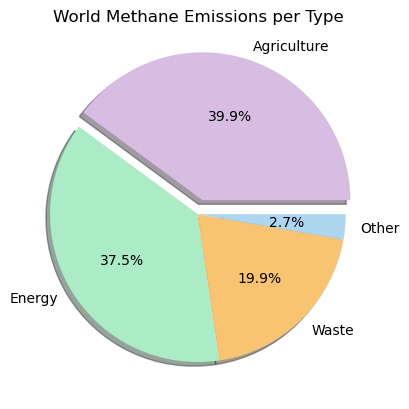

In [8]:
# plot the world emissions data
data = world_data['emissions']
labels = world_data['type']
colors = ['#D7BDE2','#ABEBC6', '#F8C471','#AED6F1']
explode = 0.1, 0, 0, 0
plt.pie(data, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True)
plt.title('World Methane Emissions per Type')
plt.show()

**Figure 1.** The methane emission types throughout the world.

As shown in figure 1, the types of methane emissions worldwide are agriculture, energy, waste, and other. Agriculture has the largest area with 39.9% and energy has the second largest area with 37.5%. **Agriculture is the top type of methane emission produced worldwide.**

Pie chart visualization can be used to visualize the part-to-whole judgements. The chart can show the most popular methane emission types throughout the World based on the size of the area within the chart. The pie chart also shows percentages.

**Pie Chart Marks & Channels:**
- Marks: Area
    - represents the type of emissions
- Channels:
    1. Color (hue)
        - each category is assigned a different color
    2. Angle
        - separated and aligned radially with a uniform height
    3. Explode
        - the agriculture slice is popped out of the chart showing that this is the largest piece
    4. Shadow
        - a slight shadow is casted to give the chart a 3D appearance

### <font color='D67F16'>Agriculture Emissions By Region for 2019-2021</font>

Compare the agriculture methane emissions by region throughout the World.

**Questions to answers:**
1. What are the total agriculture methane emissions produced by each region throughout the world?
2. How do the total agriculture methane emissions of each region compare to one another?
3. What region produces the most agriculture methane emissions throughout the world?
4. What region produces the least agriculture methane emissions throughout the world?

In [10]:
# choose all data with type agriculture, segment total and reason all
agriculture_data = df.loc[(df['type'] == 'Agriculture')
                     & (df['segment'] == 'Total')
                     & (df['reason'] == 'All')]

# drop the World data
agriculture_data_cleaned = agriculture_data.drop(agriculture_data[agriculture_data['region'] == 'World'].index, axis=0)

# sum up the agriculture emissions by region
agriculture_region_data = agriculture_data_cleaned.groupby('region', as_index=False)['emissions'].sum()
agriculture_region_data

,region,emissions
0,Africa,16892.979230
1,Asia Pacific,63241.493486
2,Central and South America,23573.521678
3,Europe,21201.239499
4,Middle East,1548.082252
5,North America,12902.826904
6,Other,7259.014160
7,Russia & Caspian,4185.945938


In [11]:
# create pivot table of agriculture emissions by region
agriculture_region_data1 = pd.pivot_table(agriculture_region_data,
                                         index = 'region',
                                         values = 'emissions').sort_values(by=['emissions'],
                                                                          ascending=False)
agriculture_region_data1

,emissions
region,
Asia Pacific,63241.493486
Central and South America,23573.521678
Europe,21201.239499
Africa,16892.979230
North America,12902.826904
Other,7259.014160
Russia & Caspian,4185.945938
Middle East,1548.082252


In [12]:
# function to return the max agriculture methane producing region
def max_agriculture_region():
    max_agriculture_emission = agriculture_region_data['emissions'].max()
    max_agriculture_region = agriculture_region_data.loc[agriculture_region_data['emissions'].idxmax(), 'region']
    return max_agriculture_region, max_agriculture_emission
# function to return the min agriculture methane producing region
def min_agriculture_region():
    min_agriculture_emission = agriculture_region_data['emissions'].min()
    min_agriculture_region = agriculture_region_data.loc[agriculture_region_data['emissions'].idxmin(), 'region']
    return min_agriculture_region, min_agriculture_emission
# function to return the mean agriculture methane emissions based on the regions
def mean_agriculture_emissions():
    mean_agriculture_emission = agriculture_region_data['emissions'].mean()
    return mean_agriculture_emission
# function to return the median agriculture methane emissions based on the regions
def median_agriculture_emissions():
    median_agriculture_emissions = agriculture_region_data['emissions'].median()
    return median_agriculture_emissions

In [13]:
max_agriculture_region()

('Asia Pacific', 63241.493485966996)

In [14]:
min_agriculture_region()

('Middle East', 1548.082251877)

In [15]:
mean_agriculture_emissions()

18850.63789320412

In [16]:
median_agriculture_emissions()

14897.903066865001

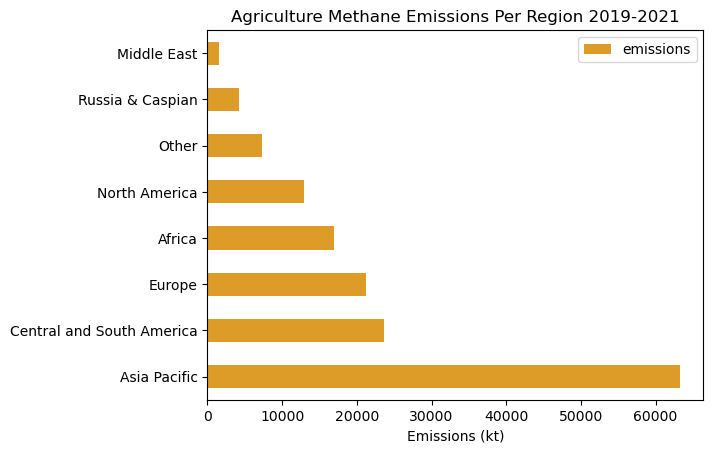

In [18]:
# plot the agriculture data per region in a bar chart
agriculture_region_data1.plot(kind='barh', color = '#DC9C27')
plt.title('Agriculture Methane Emissions Per Region 2019-2021')
plt.xlabel('Emissions (kt)')
plt.ylabel('')
plt.show()

**Figure 2.** The agriculture methane emissions by region throughout the world.

As shown in figure 2, the Asia Pacific is the largest producer of agriculture methane emissions throughout the world with a total of 63,241.49 kt. The second and third largest producers are Central and South America and Europe, respectively. The Middle East produces the least amount of agriculture methane emissions with a total of 1,548.08 kt.

It is shown that the Asia Pacific has a greater advantage at producing methane emissions through agriculture over other regions. The Asia Pacific has a very large livestock population and half of the land is used for agriculture with rice being the largest crop produced.

The mean and median agriculture emissions of the regions worldwide is 18,850.64 kt and 14,897.90 kt, respectively.

Bar chart visualizations can be used to visualize and compare the top producers of methane emissions by type agriculture based on the length of the bar.

**Bar Chart Marks & Channels:**
- Marks: line
- Channels:
    1. Length
        - expresses quantitative values
    2. Position on common scale
        - vertical
    3. Spatial regions
        - one per mark
        - aligned horizontally
        - separated vertically
        - ordered by quantitative attribute

### <font color='28AC0D'>Energy Emissions By Region in 2022</font>

Compare the energy methane emissions by region throughout the World.

**Questions to answers:**
1. What are the total energy methane emissions produced by each region throughout the world?
2. How do the total energy methane emissions of each region compare to one another?
3. What region produces the most energy methane emissions throughout the World?

In [19]:
# choose all data with type energy, segment total and reason all
energy_data = df.loc[(df['type'] == 'Energy')
                     & (df['segment'] == 'Total')
                     & (df['reason'] == 'All')]
# drop the World data
energy_data_cleaned = energy_data.drop(energy_data[energy_data['region'] == 'World'].index, axis=0)

# sum up the energy emissions by region
energy_region_data = energy_data_cleaned.groupby('region', as_index=False)['emissions'].sum()
energy_region_data

,region,emissions
0,Africa,13267.938954
1,Asia Pacific,41620.085953
2,Central and South America,7323.162752
3,Europe,6882.477523
4,Middle East,16270.412223
5,North America,20899.358522
6,Other,2420.879883
7,Russia & Caspian,26662.857387


In [20]:
# create pivot table of energy emissions by region
energy_region_data1 = pd.pivot_table(energy_region_data,
                              values='emissions',
                              index='region').sort_values(by=['emissions'],
                                                         ascending=False)
energy_region_data1

,emissions
region,
Asia Pacific,41620.085953
Russia & Caspian,26662.857387
North America,20899.358522
Middle East,16270.412223
Africa,13267.938954
Central and South America,7323.162752
Europe,6882.477523
Other,2420.879883


In [21]:
# function to return the max energy methane producing region
def max_energy_region():
    max_energy_emission = energy_region_data['emissions'].max()
    max_energy_region = energy_region_data.loc[energy_region_data['emissions'].idxmax(), 'region']
    return max_energy_region, max_energy_emission
# function to return the mean energy methane emissions based on the regions
def mean_energy_emissions():
    mean_energy_emission = energy_region_data['emissions'].mean()
    return mean_energy_emission
# function to return the median energy methane emissions based on the regions
def median_energy_emissions():
    median_energy_emissions = energy_region_data['emissions'].median()
    return median_energy_emissions

In [22]:
max_energy_region()

('Asia Pacific', 41620.08595329)

In [23]:
mean_energy_emissions()

16918.396649491377

In [24]:
median_energy_emissions()

14769.175588143

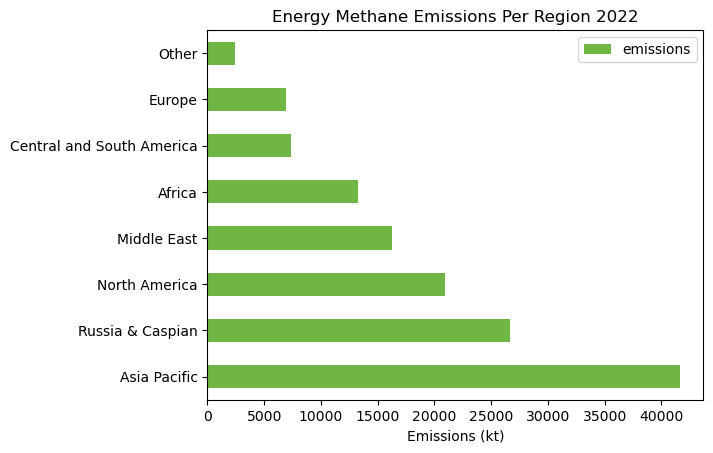

In [26]:
# plot the energy emissions data per region in a bar chart
energy_region_data1.plot(kind='barh', color = '#6FB646')
plt.title('Energy Methane Emissions Per Region 2022')
plt.xlabel('Emissions (kt)')
plt.ylabel('')
plt.show()

**Figure 3.** The energy methane emissions by region throughout the world.

As shown in figure 3, the Asia Pacific is the largest producer of energy methane emissions throughout the world with a total of 41,620.09 kt. The second and third largest producers of energy methane emissions are Russia and Caspian and North America, respectively.

It is shown that the Asia Pacific has a greater advantage of producing energy methane emissions over other regions. The Asia Pacific has one of the fastest growing economies leading to a higher demand of energy. This means there is much more use of fossil fuels (coal, oil, natural gas) leading to higher energy methane emissions emitted.

The mean and median energy emissions of the regions worldwide is 16,918.40 kt and 14,769.18 kt, respectively.

*According to the figure 2 and figure 3, the Asia Pacific produces the greatest methane by both agriculture and energy emissions.*

Bar chart visualizations can be used to visualize and compare the top producers of methane emissions by type energy based on the length of the bar.

**Bar Chart Marks & Channels:**
- Marks: line
- Channels:
    1. Length
        - expresses quantitative values
    2. Position on common scale
        - vertical
    3. Spatial regions
        - one per mark
        - aligned horizontally
        - separated vertically
        - ordered by quantitative attribute

### <font color='AC3D0D'>Total Agriculture and Energy Methane Emissions for the Top Five Methane Emitting Countries</font>

Compare the agriculture methane emissions and energy methane emissions for the top five methane emitting countries.

*The top five methane emitting countries include China, Russia, the United States, India, and Brazil.*

**Questions to answers:**
1. What are the total agriculture and energy methane emissions produced by each of the top 5 methane emitting countries?
2. How do the total agriculture and energy methane emissions of each country compare to each other?
3. Which of the top 5 methane emitting countries produces:
    1. the greatest agriculture methane emissions?
    2. the greatest energy methane emissions?
    3. the least agriculture methane emissions?
    4. the least energy methane emissions?

In [27]:
# total agriculture and energy data by top 5 country
top5_country_data = df.loc[(df['country'].isin(['China', 'Russia', 'Brazil', 'India', 'United States']))
                                & (df['segment'] == 'Total')
                                & (df['type'].isin(['Agriculture', 'Energy']))].sort_values(by='country')
top5_country_data

,region,country,emissions,type,segment,reason,baseYear
710,Central and South America,Brazil,14020.088870,Agriculture,Total,All,2019-2021
727,Central and South America,Brazil,1756.495361,Energy,Total,All,2022
460,Asia Pacific,China,18501.914060,Agriculture,Total,All,2019-2021
478,Asia Pacific,China,25372.222660,Energy,Total,All,2022
481,Asia Pacific,India,18358.517580,Agriculture,Total,All,2019-2021
500,Asia Pacific,India,5185.236328,Energy,Total,All,2022
1470,Russia & Caspian,Russia,2022.095947,Agriculture,Total,All,2019-2021
1489,Russia & Caspian,Russia,18078.083980,Energy,Total,All,2022
1387,North America,United States,9409.325195,Agriculture,Total,All,2019-2021
1406,North America,United States,16769.630860,Energy,Total,All,2022


In [28]:
# create pivot table of agriculture and energy data for top 5 countries
top5_country_data1 = pd.pivot_table(top5_country_data,
                              values=['emissions'],
                              index=['country', 'type'])
top5_country_data1

emissions
country       type                     
Brazil        Agriculture  14020.088870
              Energy        1756.495361
China         Agriculture  18501.914060
              Energy       25372.222660
India         Agriculture  18358.517580
              Energy        5185.236328
Russia        Agriculture   2022.095947
              Energy       18078.083980
United States Agriculture   9409.325195
              Energy       16769.630860

In [32]:
# function to return the top agriculture methane producing country
def top_agriculture_country():
    agriculture_type = top5_country_data.loc[top5_country_data['type'] == 'Agriculture']
    max_agriculture_country = agriculture_type.loc[agriculture_type['emissions'].idxmax(), 'country']
    max_agriculture_emission = agriculture_type['emissions'].max()
    return max_agriculture_country, max_agriculture_emission

# function to return the top energy methane producing country
def top_energy_country():
    energy_type = top5_country_data.loc[top5_country_data['type'] == 'Energy']
    max_energy_country = top5_country_data.loc[top5_country_data['emissions'].idxmax(), 'country']
    max_energy_emission = top5_country_data['emissions'].max()
    return max_energy_country, max_energy_emission

In [33]:
top_agriculture_country()

('China', 18501.91406)

In [34]:
top_energy_country()

('China', 25372.22266)

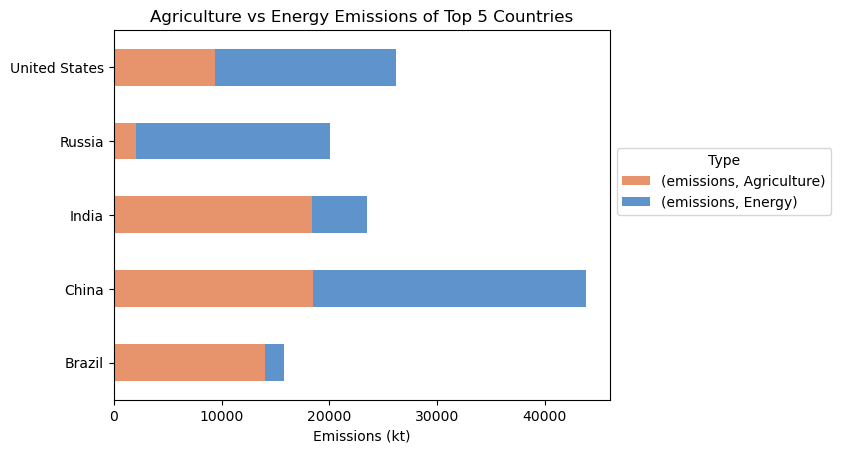

In [35]:
# plot the agriculture and energy data for top 5 countries in a stacked bar chart
colors = ('#E7936B', '#5F93CB')
ax = top5_country_data1.unstack().plot(kind='barh', stacked=True, color=colors)
ax.set_xlabel('Emissions (kt)')
ax.set_ylabel('')
ax.set_title('Agriculture vs Energy Emissions of Top 5 Countries')
ax.legend(title='Type', bbox_to_anchor=(1.0, 0.7), loc='upper left')
plt.show()

**Figure 4.** The agriculture and energy methane emissions for the top 5 methane emitting countries throughout the world.

**For Agriculture Methane Emissions**
- As shown in figure 4, out of the top five methane emitting countries, China produces the highest methane emissions through agriculture with a total of 18,501.91 kt. India is very close behind China in terms of producing the most agriculture emissions. The Asia Pacific is the greatest producer of agriculture methane emissions and China and India are both countries within this region. They are large agricultural producers with China being the worlds largest producer of rice. Both countries have a large livestock population and use organic fertilizers which can produce methane emissions through decomposition.
- Russia produces the least amount of agriculture methane emissions among the top five methane emitting countries. This can be due to their colder climate, meaning that less methane producing microbes (microorganisms that produce methane found in oxygen free environments) can reproduce and survive. Russia has worked on improving their ways of agriculture by using more efficient fertilizers and reducing their livestock.

- According to the data, the results align for top regions and top five countries:
    - **Top 3 regions:**
        1. Asia Pacific
        2. Central & South America
        3. Europe
    - **Top 3 countries:**
        1. China
        2. India
        3. Brazil
- China and India are both part of the Asia Pacific region. Brazil is part of the Central and South America region. 

**For Energy Methane Emissions**
- As shown in figure 4, out of the top five methane emitting countries, China produces the highest methane emissions through energy. The Asia Pacific is the greatest producer of energy methane emissions and China is a country within this region. China relies on coal for electricity, oil and gas production. Coal mining is one of the most significant sources of energy methane emissions from China.
- Brazil produces the least amount of energy methane emissions among the top five methane emitting countries. Brazil does not rely heavily on fossil fuels (they use renewable energy such as hydropower, wind, solar). Brazil also does not have a significant amount of coal mining due to limability. 

- According to the data, the results align for top regions and top five countries:
    - **Top 3 regions:**
        1. Asia Pacific
        2. Russia and Caspian
        3. North America
    - **Top 3 countries:**
        1. China
        2. Russia
        3. United States
- China is a part of the Asia Pacific. Russia is a part of Russia and Caspian. United States is part of North America.


Stacked bar chart visualizations can be to determine the part-to-whole relationship. It can be used to visualize the top producers of agriculture and energy methane emissions based on the length of the two bars.

**Stacked Bar Chart Marks & Channel**
- Mark: Horizontal stack of line marks
- Channels
    1. Length
        - expresses quantitative values
    2. Position on common scale
        - vertical
    3. Color (hue)
        - different colors based on emisson type (agriculture/energy)
    4. Spatial regions
        - two per mark
        - aligned horizontally, separated vertically

### <font color='0DAC98'>Total Methane Emissions By Type for the Top Five Methane Emitting Countries</font>

Compare the different types of methane emissions for the top five methane emitting countries.

**Questions to answers:**
1. Which countries are the greatest producers for each type of methane emissions?
2. Which country has the greatest difference between agriculture and energy methane emissions?
3. Which type of methane emission is most produced across the top 5 methane emitting countries?
4. Which type of methane emissions has the greatest difference amongst the top 5 methane emitting countries?

In [36]:
# Total emissions per emission type for top 5 countries
top5_by_emission_type = df.loc[(df['country'].isin(['China', 'Russia', 'Brazil', 'India', 'United States']))
                       & (df['segment'] == 'Total')].sort_values('country')
top5_by_emission_type

,region,country,emissions,type,segment,reason,baseYear
727,Central and South America,Brazil,1756.495361,Energy,Total,All,2022
729,Central and South America,Brazil,3800.057129,Waste,Total,All,2019-2021
728,Central and South America,Brazil,387.701386,Other,Total,All,2019-2021
710,Central and South America,Brazil,14020.088870,Agriculture,Total,All,2019-2021
460,Asia Pacific,China,18501.914060,Agriculture,Total,All,2019-2021
480,Asia Pacific,China,10424.141600,Waste,Total,All,2019-2021
479,Asia Pacific,China,1377.870972,Other,Total,All,2019-2021
478,Asia Pacific,China,25372.222660,Energy,Total,All,2022
500,Asia Pacific,India,5185.236328,Energy,Total,All,2022
501,Asia Pacific,India,571.256714,Other,Total,All,2019-2021


In [37]:
# create pivot table of emission type data for top 5 countries
top5_by_emission_type1 = pd.pivot_table(top5_by_emission_type,
                                     index='type', columns='country',
                                     values='emissions')
top5_by_emission_type1

country,Brazil,China,India,Russia,United States
type,,,,,
Agriculture,14020.088870,18501.914060,18358.517580,2022.095947,9409.325195
Energy,1756.495361,25372.222660,5185.236328,18078.083980,16769.630860
Other,387.701386,1377.870972,571.256714,323.421631,538.362610
Waste,3800.057129,10424.141600,5551.760742,3931.244385,5117.928223


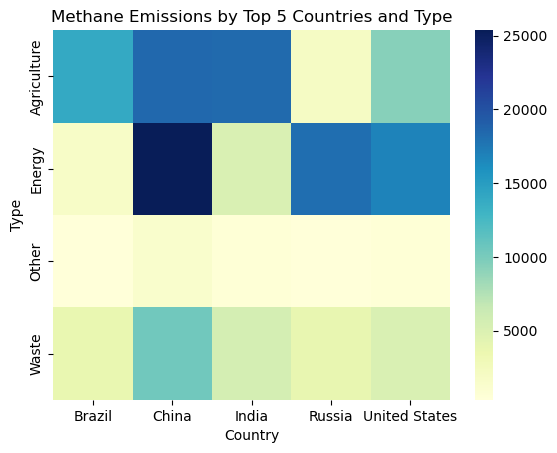

In [38]:
# create a heat map to convey emission types per top 5 countries
sns.heatmap(top5_by_emission_type1, cmap='YlGnBu')
plt.title('Methane Emissions by Top 5 Countries and Type')
plt.xlabel('Country')
plt.ylabel('Type')
plt.show()

**Figure 5.** Heat map displaying the total methane emissions for the top 5 methane emitting countries throughout the world based on type of methane emission.

As shown in figure 5, China is the number one producer of energy, waste, and other methane emissions. Agriculture and energy have a majority of darker colors compared to that of waste and other. Energy shows the greatest difference across the countries. Russia has the greatest difference in emissions between energy and agriculture. For agriculture, as we already know China and India are the top two produers of agriculture methane emissions. Their total emissions for agriculture are almost the same which can be shown in the heat map because their shades are almost indentical. It is difficult to differentiate between the top agriculture producer, but it is clear who the top energy and waste producer is (China).

Heat map visualizations can be used to visualize the top producers for each type of methane emissions based on the saturation of the corresponding box in the heat map. Heat maps can visualize the correlation between the types of methane emissions and countries.

**Heat Map Marks & Channels:**
- Marks: Points
- Channels:
    1. Color (hue) by quantitative attribute (emissions)


###  <font color='0F9545'>Gas Pipelines and LNG Facilities Segment for Energy Methane Emissions for the Top Five Countries</font>

Compare the Gas pipelines and Liquified Natural Gas (LNG) facilities segment for the energy methane emissions for the top five methane emitting countries.

Gas pipelines and LNG facilities have two reasons: Fugitive vs Vented.

Fugitive methane emissions:
- occur from leakages
- are unintended
- can occur from faulty seals/leaks, or malfunctions

Vented methane emissions:
- occur from intentional releases
- examples: safety reasons, due to the design of the facility or equipment (e.g. pneumatic controllers) or operational requirements (e.g. venting a pipeline for inspection and maintenance)

**Questions to answers:**
1. Which country is the greatest producer of fugitive methane emissions?
2. Which country is the greatest producer of vented methane emissions?
3. Which country is the produces the least fugitive methane emissions?
4. Which country is the produces the least vented methane emissions?
5. Based on the top 5 countries, which emission is produced more, fugitive or vented?

In [39]:
# energy types for segment Gas pipelines and LNG facilities
energy_reasons = df.loc[(df['type'] =='Energy')
                     & (df['segment'] == 'Gas pipelines and LNG facilities')]
energy_reasons

,region,country,emissions,type,segment,reason,baseYear
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
17,Africa,Angola,2.591680,Energy,Gas pipelines and LNG facilities,Fugitive,2022
18,Africa,Angola,1.381880,Energy,Gas pipelines and LNG facilities,Vented,2022
33,Africa,Benin,0.098756,Energy,Gas pipelines and LNG facilities,Fugitive,2022
...,...,...,...,...,...,...,...
1495,Russia & Caspian,Turkmenistan,166.572006,Energy,Gas pipelines and LNG facilities,Vented,2022
1513,Russia & Caspian,Uzbekistan,151.171005,Energy,Gas pipelines and LNG facilities,Fugitive,2022
1514,Russia & Caspian,Uzbekistan,80.604401,Energy,Gas pipelines and LNG facilities,Vented,2022
1529,World,NaN,7801.729980,Energy,Gas pipelines and LNG facilities,Fugitive,2022


In [40]:
# top 5 country energy type reasons for segment Gas pipelines and LNG facilities
top5_by_energy_reasons = energy_reasons.loc[(energy_reasons['country'].isin(['China',
                                                                             'Russia',
                                                                             'Brazil',
                                                                             'India',
                                                                             'United States']))]
top5_by_energy_reasons

,region,country,emissions,type,segment,reason,baseYear
463,Asia Pacific,China,552.119995,Energy,Gas pipelines and LNG facilities,Fugitive,2022
464,Asia Pacific,China,294.390991,Energy,Gas pipelines and LNG facilities,Vented,2022
484,Asia Pacific,India,191.925003,Energy,Gas pipelines and LNG facilities,Fugitive,2022
485,Asia Pacific,India,102.334000,Energy,Gas pipelines and LNG facilities,Vented,2022
712,Central and South America,Brazil,112.828003,Energy,Gas pipelines and LNG facilities,Fugitive,2022
713,Central and South America,Brazil,60.160000,Energy,Gas pipelines and LNG facilities,Vented,2022
1390,North America,United States,1781.369995,Energy,Gas pipelines and LNG facilities,Fugitive,2022
1391,North America,United States,949.828979,Energy,Gas pipelines and LNG facilities,Vented,2022
1473,Russia & Caspian,Russia,1231.369995,Energy,Gas pipelines and LNG facilities,Fugitive,2022
1474,Russia & Caspian,Russia,656.567993,Energy,Gas pipelines and LNG facilities,Vented,2022


In [41]:
# create pivot table of energy segment type data for top 5 countries by reason
top5_by_energy_reasons1 = pd.pivot_table(top5_by_energy_reasons,
                                         index='country', columns='reason')
top5_by_energy_reasons1

emissions            
reason            Fugitive      Vented
country                               
Brazil          112.828003   60.160000
China           552.119995  294.390991
India           191.925003  102.334000
Russia         1231.369995  656.567993
United States  1781.369995  949.828979

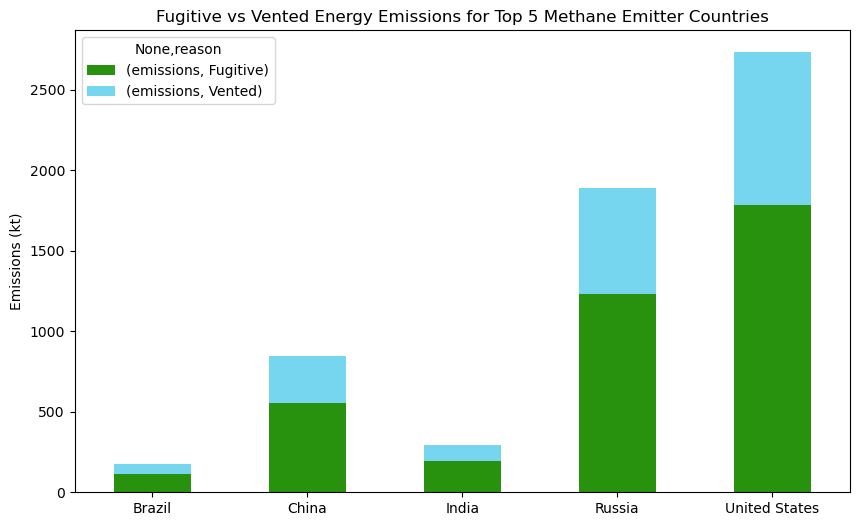

In [43]:
# plot the energy segment type data for top 5 countries in a stacked bar chart
colors = ('#28920F', '#76D6F0')
ax = top5_by_energy_reasons1.plot.bar(stacked=True, color=colors, figsize = (10,6))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Emissions (kt)')
ax.set_title('Fugitive vs Vented Energy Emissions for Top 5 Methane Emitter Countries')
plt.show()

**Figure 6.** The energy segment Gas pipelines and LNG facilities reasons, fugitive and vented, for the top 5 methane emitting countries throughout the world.

As shown in figure 6, fugitive emissions are much higher for each of the five top methane emitting countries compared to vented. The United States is ths greatest producer for both fugitive and vented energy methane emissions. The United States has a high oil and gas production, especially natural gas for electricity), and an aging natural gas infrastrucutre. Brazil produces the least amount of fugitive and vented energy methane emissions. Brazil uses renewable resources to produce electricity and has regulations set in place to reduce these emissions into our atmosphere.

Stacked bar chart visualizations can be to determine the part-to-whole relationship. It can be used to compare the two types of reasons for this segment based on the length of the two bars. This stacked bar chart visualization can help understand how the type of energy is emitted into the atmosphere by gas pipelines and LNG facilities. 

**Stacked Bar Chart Marks & Channel**
- Mark: Vertical stack of line marks
- Channels:
    1. Length
    2. Position on common scale (horizontal)
    3. Color (hue)
    4. Spatial regions
          - two per mark
          - aligned horizontally, separated vertically

### <font color='9E7C2B'>Agriculture Methane Emissions Per Country</font>

Compare the total agriculture methane emissions for each country throughout the World.

**Questions to answers:**
1. Where in the world is the most agriculture methane emissions produced?
2. What country produces the most agriculture methane emissions throughout the World?

In [34]:
# rename United States in dataframe to match the geopandas file
renamed_df = df.replace('United States', 'United States of America')
renamed_df

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.986999,Energy,Onshore gas,Fugitive,2022
...,...,...,...,...,...,...,...
1543,World,NaN,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022
1544,World,NaN,30296.500000,Energy,Steam coal,All,2022
1545,World,NaN,133350.984400,Energy,Total,All,2022
1546,World,NaN,9737.874023,Other,Total,All,2019-2021


In [35]:
# get the agriculture total data for each country
countries_agriculture_emissions = renamed_df.loc[(renamed_df['type']=='Agriculture')
                        & (renamed_df['segment'] == 'Total')]
countries_agriculture_emissions = countries_agriculture_emissions.drop(
    countries_agriculture_emissions[countries_agriculture_emissions['region'] == 'World'].index, axis=0)
countries_agriculture_emissions

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
15,Africa,Angola,400.969574,Agriculture,Total,All,2019-2021
31,Africa,Benin,105.691032,Agriculture,Total,All,2019-2021
40,Africa,Botswana,97.258492,Agriculture,Total,All,2019-2021
49,Africa,Cameroon,279.531220,Agriculture,Total,All,2019-2021
...,...,...,...,...,...,...,...
1430,Russia & Caspian,Azerbaijan,195.197525,Agriculture,Total,All,2019-2021
1448,Russia & Caspian,Kazakhstan,762.098084,Agriculture,Total,All,2019-2021
1470,Russia & Caspian,Russia,2022.095947,Agriculture,Total,All,2019-2021
1492,Russia & Caspian,Turkmenistan,304.871765,Agriculture,Total,All,2019-2021


In [36]:
# create pivot table of agriculture total data for each country
countries_agriculture_emissions1 = pd.pivot_table(countries_agriculture_emissions,
                                                 index='country',
                                                 values='emissions').sort_values(by='emissions')
countries_agriculture_emissions1

,emissions
country,
Seychelles,0.078721
Equatorial Guinea,0.438739
Brunei,0.841234
Bahrain,0.964592
Trinidad and Tobago,4.345528
...,...
European Union,8851.337891
United States of America,9409.325195
Brazil,14020.088870


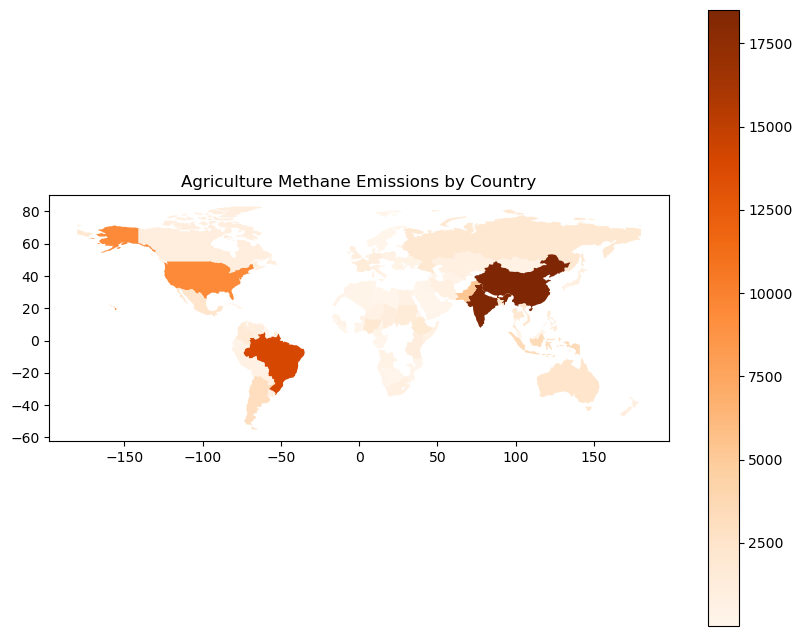

In [37]:
# get the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# merge the country shape file data with the agriculture emissions data for each country
merged = world.merge(countries_agriculture_emissions1, left_on='name', right_on='country')

# create a choropleth map
fig, ax = plt.subplots(figsize=(10,8))
merged.plot(column='emissions', cmap='Oranges', legend=True, ax=ax)
ax.set_title('Agriculture Methane Emissions by Country')
plt.show()

**Figure 7.** The agriculture methane emissions by country throughout the world.

As shown in figure 7, China and India have the darkest shade of orange meaning they are the greatest agriculture methane producers in the world. These countries are part of the Asia Pacifia which produces the most agriculture methane emissions,

Choropleth map visualizations can be used to visualize the top producers of agriculture methane emissions based on the saturation of the area on the world map.

**Choropleth Map Marks & Channels:**
- Marks: Area
- Channels:
    - Color (hue)

### Conclusion

In conclusion, methane is an important greenhouse gas found within our atmosphere that traps heat. According to the dataset, the types of methane emissions emitted worldwide are agriculture, energy, waste, and other. The two highest produced methane emissions worldwide are agriculture and energy with a mean of 18,850.64 kt and 16,918.40 kt, respectively. The Asia Pacific, Central and South America, and Europe produce the most agriculture methane emissions. The Middle East produces the least amount of agriculture methane emissions. The Asia Pacific, Russia and Caspian, and North America produce the most energy emissions. The Asia Pacific is the top producer for both agriculture and energy methane emissions with a total of 63,241.493486 kt and 41,620.085953 kt, respectively.
   
The top five methane emitting countries are China, Russia, the United States, India, and Brazil. China and India produce the highest methane emissions through agriculture. China produces approximately 18,501.91 kt through agriculture. The Asia Pacific is the greatest producer of agriculture methane emissions and China and India are both countries within this region. Russia produces the least amount of agriculture methane emissions among the top five methane emitting countries. China produces the highest methane emissions through energy with a total of 25,372.22 kt. The Asia Pacific is the greatest producer of energy methane emissions and China is a country within this region. Brazil produces the least amount of energy methane emissions among the top five methane emitting countries.

Energy methane emissions consist of gas pipelines and LNG facilities. This group of energy consists of two reasons, fugitive and vented. Fugitive methane emissions occur from leakages and are not intended to happen. Vented methane emissions occur from intentional releases. The fugitive emissions are much higher for each of the 5 top methane emitting countries compared to vented. The United States produces the highest energy emissions through both fugitive and vented emissions. Brazil produces the least amount of fugitive and vented energy methane emissions.

Analyzing the type of methane emissions emitted into our atmosphere is crucial to understanding the affects on Earth's temperature and climate. Methane emissions in our atmosphere contribute to climate change.

**Citations**

1. IEA (2023), Methane Tracker, IEA, Paris https://www.iea.org/data-and-statistics/data-tools/methane-tracker
2. “Greenhouse Gases.” EPA, Environmental Protection Agency, 19 Mar. 2020, https://www.epa.gov/report-environment/greenhouse-gases.
3. “Center for Science Education.” Methane | Center for Science Education, 2012, https://scied.ucar.edu/learning-zone/how-climate-works/methane#:~:text=Methane%20is%20gas%20that%20is,is%20a%20powerful%20greenhouse%20gas.